<a href="https://colab.research.google.com/github/seismosmsr/machine_learning/blob/main/gedi_analysis_HJA_9_18_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [14]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(utils)

In [2]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=1c71bc06bd9b849ba4b51c8d083c3bc4&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbG5PQ2xjWjZXX25TcHZ5RUJPMTZydDhvM1lWTVVSMmlCYnRjOFBLSzdMNThvUzFXaGx5cmdjZkwyczN6REZfQSIsInN0YXRlIjoiMWM3MWJjMDZiZDliODQ5YmE0YjUxYzhkMDgzYzNiYzQifQ==


In [ ]:
# while(TRUE){}

In [ ]:
# drive_deauth()
# drive_auth(use_oob = TRUE, cache = FALSE)

In [ ]:
# GEDI data
# https://drive.google.com/file/d/14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4/view?usp=drive_link

# Landtrendr data
# https://drive.google.com/file/d/1FrN1tUojGV80f3kDtmezsFsvLabIoGiW/view?usp=drive_link

# HUC 8
# https://drive.google.com/file/d/1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z/view?usp=drive_link

# HUC 10
# https://drive.google.com/file/d/1m86VWKw3nys-oY931eq9dC6xv0cEfs4a/view?usp=drive_link

# HUC 12
# https://drive.google.com/file/d/18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL/view?usp=drive_link

# GEDI vectorized by YOD, Queen's rule.
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link

In [4]:
drive_download(file = as_id('1FrN1tUojGV80f3kDtmezsFsvLabIoGiW'), path =  '/content/HJA_LandTrendr_84_23.tif', overwrite = FALSE)

File downloaded:

• HJA_LandTrendr_84_23_2.tif <id: 1FrN1tUojGV80f3kDtmezsFsvLabIoGiW>

Saved locally as:

• /content/HJA_LandTrendr_84_23.tif



In [5]:
drive_download(file = as_id('14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4'), path =  '/content/HJA_gedi.gpkg', overwrite = TRUE)

File downloaded:

• HJA_GEDI_4.gpkg <id: 14jTxo28D2bsC68EpVsbSaY7SpYM5MIA4>

Saved locally as:

• /content/HJA_gedi.gpkg



In [6]:
drive_download(file = as_id('1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z'), path =  '/content/huc_8.gpkg', overwrite = TRUE)
drive_download(file = as_id('1m86VWKw3nys-oY931eq9dC6xv0cEfs4a'), path =  '/content/huc_10.gpkg', overwrite = TRUE)
drive_download(file = as_id('18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL'), path =  '/content/huc_12.gpkg', overwrite = TRUE)

File downloaded:

• WBDHU8.gpkg <id: 1r6CIYLOy01N8B1jc7Hr8AJUkA0jPXp9z>

Saved locally as:

• /content/huc_8.gpkg

File downloaded:

• WBDHU10.gpkg <id: 1m86VWKw3nys-oY931eq9dC6xv0cEfs4a>

Saved locally as:

• /content/huc_10.gpkg

File downloaded:

• WBDHU12.gpkg <id: 18ayVCWhBkP1Tb_wrWgPJea8vaWEiPgOL>

Saved locally as:

• /content/huc_12.gpkg



In [7]:
# https://drive.google.com/file/d/1miOMqCh081yceVUfVVOL5JtxpKUgBO-2/view?usp=drive_link
drive_download(file = as_id('1miOMqCh081yceVUfVVOL5JtxpKUgBO-2'), path =  '/content/gedi_vector.gpkg', overwrite = TRUE)

File downloaded:

• yod_vector.gpkg <id: 1miOMqCh081yceVUfVVOL5JtxpKUgBO-2>

Saved locally as:

• /content/gedi_vector.gpkg



In [17]:
# https://drive.google.com/file/d/1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa/view?usp=drive_link
drive_download(file = as_id('1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa'), path =  '/content/conus_2003.tif', overwrite = TRUE)

Auto-refreshing stale OAuth token.

File downloaded:

• conus_forest_biomass_mg_per_ha.img <id: 1qpVnW4V_qbE1rAR4wAq1yMNRIZniVFsa>

Saved locally as:

• /content/conus_2003.tif



In [18]:
# https://drive.google.com/file/d/1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh/view?usp=drive_link

drive_download(file = as_id('1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh'), path =  '/content/conus_2016.tif', overwrite = TRUE)

File downloaded:

• biomass_k10_2016.tif <id: 1X-D5SIaH18skJ5Wshzge1BxlvRZOOWCh>

Saved locally as:

• /content/conus_2016.tif



In [19]:
# https://drive.google.com/file/d/1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4/view?usp=drive_link

drive_download(file = as_id('1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4'), path =  '/content/hja_2008.tif', overwrite = TRUE)

File downloaded:

• AGLB_2008.tif <id: 1HGLy-drZfu5wmWW9xVbCkQjHGdqFbGF4>

Saved locally as:

• /content/hja_2008.tif



In [20]:
# https://drive.google.com/file/d/1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI/view?usp=drive_link
drive_download(file = as_id('1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI'), path =  '/content/wnf_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS/view?usp=drive_link
drive_download(file = as_id('1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS'), path =  '/content/fire_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms/view?usp=drive_link
drive_download(file = as_id('1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms'), path =  '/content/harvest_history.gpkg', overwrite = TRUE)

# https://drive.google.com/file/d/1XluoE3kGZ1u5-az0EmimhRpe__qzApM4/view?usp=drive_link
drive_download(file = as_id('1XluoE3kGZ1u5-az0EmimhRpe__qzApM4'), path =  '/content/aoi_boundary.geojson', overwrite = TRUE)

File downloaded:

• clip_wnfveg6.gpkg <id: 1MXa0GC0bWAbMSVpR7Gpc4cOFyCRxpJfI>

Saved locally as:

• /content/wnf_history.gpkg

File downloaded:

• Fire_History_HJA.gpkg <id: 1PFW8YtCJ-Afxb7XTM94j7IcZDQc6r3FS>

Saved locally as:

• /content/fire_history.gpkg

File downloaded:

• HJA_Harvest_Sites.gpkg <id: 1igHhc0FY2TBm7DMHNWMoqTbLHv2qvgms>

Saved locally as:

• /content/harvest_history.gpkg

File downloaded:

• hja_boundary.geojson <id: 1XluoE3kGZ1u5-az0EmimhRpe__qzApM4>

Saved locally as:

• /content/aoi_boundary.geojson



In [21]:
# https://drive.google.com/file/d/1rIueY7IXML2Gu06MR2pijfgqOFydKTzh/view?usp=drive_link
drive_download(file = as_id('1rIueY7IXML2Gu06MR2pijfgqOFydKTzh'), path =  '/content/Huc_Intersection_Set.zip', overwrite = TRUE)

File downloaded:

• HUC_Intersection_Set.zip <id: 1rIueY7IXML2Gu06MR2pijfgqOFydKTzh>

Saved locally as:

• /content/Huc_Intersection_Set.zip



In [15]:
# Set the file path to the downloaded zip file and the destination where it should be extracted
zip_file_path <- '/content/Huc_Intersection_Set.zip'
extraction_path <- '/content/Huc_Intersection_Set'

# Unzip the file
unzip(zip_file_path, exdir = extraction_path)

In [12]:
while(TRUE){}

In [22]:
hja_2008_tif <- stack('/content/hja_2008.tif')
conus_2003_tif <- stack('/content/conus_2003.tif')
conus_2016_tif  <- stack('/content/conus_2016.tif')

In [23]:
landtrendr_tif <- stack('/content/HJA_LandTrendr_84_23.tif')

In [29]:
gedi_int_dt <-
"/content/Huc_Intersection_Set/content/HUC_Intersection_Set" %>%
  list.files(full.names = T) %>%
  lapply(st_read) %>%
  lapply(data.table) %>%
  rbindlist()

Reading layer `huc_10_1' from data source 
  `/content/Huc_Intersection_Set/content/HUC_Intersection_Set/huc_10_1.gpkg' 
  using driver `GPKG'
Simple feature collection with 94451 features and 40 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.1598 ymin: 44.70176 xmax: -121.7601 ymax: 44.84941
Geodetic CRS:  WGS 84
Reading layer `huc_10_10' from data source 
  `/content/Huc_Intersection_Set/content/HUC_Intersection_Set/huc_10_10.gpkg' 
  using driver `GPKG'
Simple feature collection with 73478 features and 40 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.6751 ymin: 44.31805 xmax: -122.4225 ymax: 44.48284
Geodetic CRS:  WGS 84
Reading layer `huc_10_11' from data source 
  `/content/Huc_Intersection_Set/content/HUC_Intersection_Set/huc_10_11.gpkg' 
  using driver `GPKG'
Simple feature collection with 85232 features and 40 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.6787 ymin: 44.26722 xmax: -122.415 ymax: 44.41

In [38]:
gedi_int_dt$mean_landtrendr %>% table

.
      0       1       2       3 
4249926 1148941   25128   23653 

In [43]:
gedi_int_dt %>% nrow
gedi_int_dt[l4_quality_flag ==1,] %>% nrow

gedi_int_dt %>% names

[1] 5447648

[1] 1796045

[1] "agbd"               "lat_lowestmode"     "lon_lowestmode"    
 [4] "agbd_pi_lower"      "agbd_pi_upper"      "agbd_se"           
 [7] "agbd_t"             "agbd_t_se"          "algorithm_run_flag"
[10] "channel"            "degrade_flag"       "delta_time"        
[13] "elev_lowestmode"    "l2_quality_flag"    "l4_quality_flag"   
[16] "gedi_year"          "min_landtrendr"     "max_landtrendr"    
[19] "mean_landtrendr"    "median_landtrendr"  "min_hja_2008"      
[22] "max_hja_2008"       "mean_hja_2008"      "median_hja_2008"   
[25] "min_conus_2003"     "max_conus_2003"     "mean_conus_2003"   
[28] "median_conus_2003"  "min_conus_2016"     "max_conus_2016"    
[31] "mean_conus_2016"    "median_conus_2016"  "gedi_vec_id"       
[34] "gedi_vec_year"      "gedi_vec_area"      "Ownership"         
[37] "LandManager"        "FIRE_INC_ID"        "FIRE_NAME"         
[40] "FIRE_YEAR"          "geom"

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'
`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


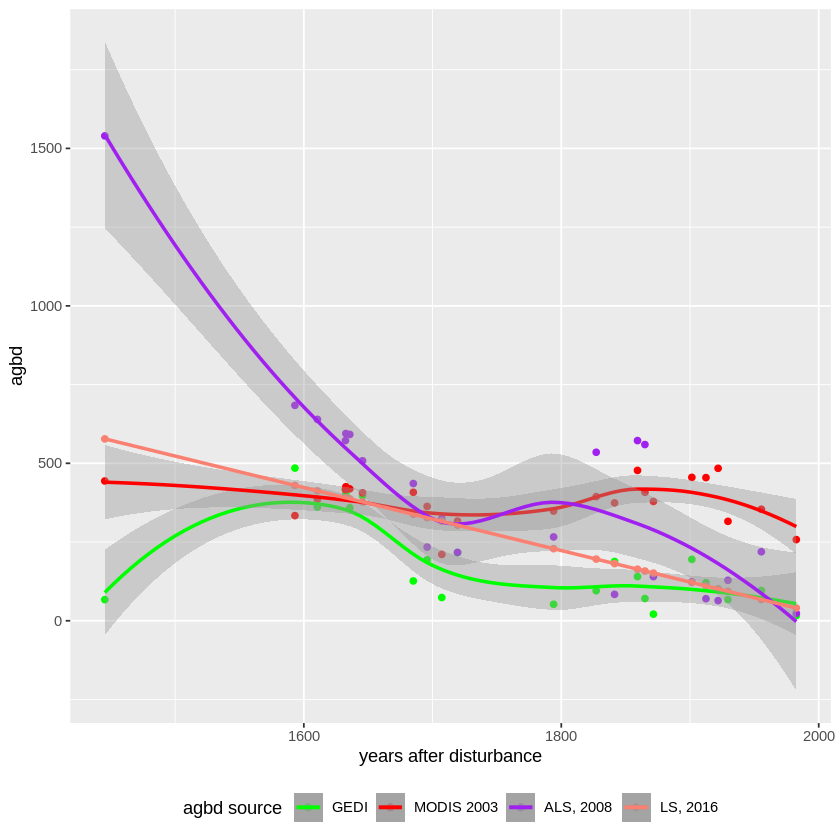

In [44]:
gedi_int_dt[!is.na(mean_hja_2008) &!is.na(agbd) ,][,list(agbd = mean(agbd,na.rm=T),mean_conus_2003 = mean(mean_conus_2003,na.rm=T),mean_hja_2008 = mean(mean_hja_2008,na.rm=T),mean_conus_2016 = mean(mean_conus_2016,na.rm=T)),by=.(gedi_year,min_landtrendr)] %>%
  ggplot(aes(x=2023-mean_conus_2016,y=agbd,color='GEDI' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))))+
  geom_point( ) +
  geom_point(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_point(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  ) +
  geom_point(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016')))  )+
  # geom_abline(color='red') +
  geom_smooth( ) +
  geom_smooth(aes(y=mean_conus_2003,color='MODIS 2003' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_hja_2008,color='ALS, 2008' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  geom_smooth(aes(y=mean_conus_2016,color='LS, 2016' %>% factor(levels = c('GEDI','ALS, 2008','MODIS 2003','LS, 2016'))) ) +
  # Hide the annotations
  # Manually add custom legend
  xlab('years after disturbance')+
  scale_color_manual(
    values = c('GEDI' = 'green', 'MODIS 2003' = 'red', 'ALS, 2008' = 'purple', 'LS, 2016' = 'salmon'),
    name = 'agbd source',  # Changing the name of the legend here
    breaks = c('GEDI','MODIS 2003','ALS, 2008','LS, 2016'),
    labels = c('GEDI', 'MODIS 2003', 'ALS, 2008','LS, 2016'),
    position = 'bottom') +
  theme(legend.position = 'bottom')

In [ ]:
year_off <- 1

agbd_preval_lm <-
summary_dt[l4_quality_flag ==1 & min.yod>1984 & round(min.yod) == (year %>% as.numeric-year_off) & round(max.yod) == (year %>% as.numeric-year_off),][,agbd_group:= round(min.preval,-1)][,agbd_group:= round(min.preval,-2)][,mag_group:= round(min.mag,-2)][,yod_group:= round(2023 - min.yod)][,list(min.preval = mean(mean.preval,na.rm=T),min.mag= mean(mean.mag,na.rm=T),agbd= mean(agbd,na.rm=T)),by=c('agbd_group','mag_group','yod_group')][,min.endval:=(min.preval-min.mag)] %>%
  lm(agbd~min.endval,.)

summary_dt$agbd_postval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval-min.mag)])
summary_dt[min.preval ==0]$agbd_postval <-NA

summary_dt$agbd_preval <- predict(agbd_preval_lm,summary_dt[,min.endval:=(min.preval)])
summary_dt[min.preval ==0]$agbd_preval <-NA

ERROR: ignored

In [ ]:
fire_history_gpkg <- st_read('/content/Fire_History_polygon.gpkg')

In [ ]:
fire_history_gpkg <- fire_history_gpkg %>% st_cast('POLYGON')

In [ ]:
fire_history_int <- summary_dt %>% st_as_sf %>% st_intersects(fire_history_gpkg %>% st_transform(st_crs(summary_dt$geom)))

In [ ]:
(fire_history_int %>% unlist)[1:5]

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
fire_history_gpkg %>% data.table %>% head %>% names


In [ ]:
fire_summary_dt <- data.table(summary_dt, (fire_history_gpkg %>% data.table)[,c('FIRE_NUM','FIRE_CODE','FIRE_NAME','FIRE_YEAR')][fire_history_int %>% lapply(function(x){x[1]}) %>% unlist,])


In [ ]:
fire_summary_dt$FIRE_YEAR %>% table

In [ ]:
# huc_8_summary_dt

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
# # resample_dt[,agbd := rnorm(1,agbd,agbd_se),by=row_id]
# # gc()
# resamp_vec <-
# 1:nrow(resample_dt) %>%
#   lapply(function(x){
#     if(!is.na())
#     rnorm(1,resample_dt$agbd[[x]],resample_dt$agbd_sd[[x]])
#   })
resample_dt <- NULL
gc()

In [ ]:
summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
summary_dt$group <- NA
# summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



summary_dt$group <- NA
summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
cluster_dt$group_new <- 1:nrow(cluster_dt)
cluster_dt <- cluster_dt[order(group)]
# print(cluster_dt)
summary_dt$group <- cluster_dt$group_new[summary_dt$group]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

In [ ]:
install.packages('randomForest')

In [ ]:
library(randomForest)

In [ ]:
calibration_dt[,group_quantile:=as.integer(cut(mean.preval-mean.mag, breaks = quantile((mean.preval-mean.mag)[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE))  %>%as.factor()]

calibration_dt %>%
  ggplot(aes(x = mean.preval-mean.mag,y=agbd))+
  geom_point(aes(color=group_quantile))

In [ ]:
calibration_dt <- resample_dt[min.yod>1984 & !is.na(agbd) ,]
calibration_dt$id <- 1:nrow(calibration_dt)
calibration_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# calibration_dt[,group_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# calibration_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]


# calibration_dt %>%
#   ggplot(aes(x=agbd))+
#   geom_boxplot(aes(color=postval_quantile))
# names(calibration_dt)
# rf_form <- as.formula(paste('group_quantile ~',c('post_val',(calibration_dt %>% names)[18:41]) %>% paste(.,collapse = '+')))
# resample_dt$id <- 1:nrow(resample_dt)

# resample_dt[,agbd_quantile:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]
# resample_dt[,postval_quantile:=as.integer(cut(mean.preval - mean.mag, breaks = quantile(mean.preval - mean.mag, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) %>% factor ]

# resample_dt[,post_val := mean(mean.preval - mean.mag),by = id]
# rf_result <-  randomForest(rf_form,resample_dt[min.yod>1984 & !is.na(agbd)])


In [ ]:
while(TRUE){}

In [ ]:
post_gedi_dt %>%head

In [ ]:
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)),by = .(round(median.yod/5)*5)]

# table(resample_dt$group,round(resample_dt$median.yod /1)*1)

In [ ]:
fire_summary_dt$gedi_era <-  fire_summary_dt$min.yod > min(fire_summary_dt$year %>% as.numeric)

fire_summary_dt$post_gedi <-  (fire_summary_dt$year %>% as.numeric) - fire_summary_dt$mean.yod

# fire_summary_dt$pre_gedi <-

In [ ]:
post_gedi_dt <- fire_summary_dt[l4_quality_flag ==1 & min.yod>1984 & gedi_era  ]
post_gedi_dt[agbd >0 &year %>% as.numeric == round(mean.yod+1) |year %>% as.numeric == round(mean.yod+1) | year %>% as.numeric == round(mean.yod+2)| year %>% as.numeric == round(mean.yod+3)| year %>% as.numeric == round(mean.yod+4)| year %>% as.numeric == round(mean.yod+5)]    %>%
  ggplot(aes(y=agbd,x=mean.preval-mean.mag))+
  geom_bin2d()+
  geom_smooth(method='lm')

In [ ]:
fire_summary_dt$gedi_era %>% table

In [ ]:
# 1:1000
resample_dt <- fire_summary_dt
# resample_dt <- fire_summary_dt[min.yod>1984 & !is.na(agbd) & is.na(FIRE_YEAR) & l4_quality_flag ==1 &min.endval>0]

# resample_dt %>% head


# agbd_preval_lm <-resample_dt[] %>%
#   lm(agbd~min.endval,.)

# agbd_preval_lm %>% summary

resample_dt$agbd_postval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval-min.mag)])
resample_dt$agbd_preval <- predict(agbd_preval_lm,resample_dt[,min.endval:=(min.preval)])

# min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)-c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)-c(1,2))
resample_dt[,min.endval:=(min.preval-min.mag)]
# resample_dt$min.endval
# # resample_dt$agbd_postval
# # resample_dt[,agbd_postval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
# # resample_dt[,agbd_preval:=mean(agbd[min.yod>1984 & round(min.yod) %in% c(round(year %>% as.numeric)+c(1,2)) &  round(max.yod) %in% c(round(year%>% as.numeric)+c(1,2))],na.rm=T),by = group]
resample_dt[,group:=as.integer(cut(agbd, breaks = quantile(agbd, probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]

resample_dt[,group_agbd_preval:=mean(agbd[min.yod>1984 & round(mean.yod) %in% c(round(year %>% as.numeric)+c(1,2,3))],na.rm=T) ,by=group]

resample_dt[,group_agbd_postval:=mean(agbd[min.yod>1984 & round(mean.yod) < round(year %>% as.numeric) ],na.rm=T) ,by=group]


plot_dt <- resample_dt[min.yod>1984 &l4_quality_flag ==1,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd,na.rm=T),yad = mean(2023-mean.yod),group_agbd_preval=mean(group_agbd_preval,na.rm=T),group_agbd_postval=mean(group_agbd_postval,na.rm=T),n = length(mean.yod)),by = .(group,yod_round)][yad>1]


plot_dt[,agbd_yr:=(agbd/yad),by=group]

plot_dt[order(yad),agbd_yr_cumsum := cumsum(agbd/yad)-group_agbd_postval,by = group]

# summary_dt[,group_quantile:=as.integer(cut(agbd_postval, breaks = quantile(agbd_postval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 1/3),na.rm=T), labels = FALSE, include.lowest = TRUE)) ]
# summary_dt$group <- NA
# # summary_dt[!is.na(agbd) & median.preval > 0, group_quantile := kmeans(((median.preval - median.mag) / median.preval)[.I], centers = 4)$cluster]



# summary_dt$group <- NA
# summary_dt[!is.na(agbd_postval), group := kmeans((agbd_postval)[.I], centers = 3)$cluster]


# cluster_dt <- summary_dt[!is.na(agbd) & median.preval > 0,list(agbd_postval = mean(agbd_postval)),by=group][order(agbd_postval)]
# cluster_dt$group_new <- 1:nrow(cluster_dt)
# cluster_dt <- cluster_dt[order(group)]
# # print(cluster_dt)
# summary_dt$group <- cluster_dt$group_new[summary_dt$group]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group_quantile][order(agbd_postval)]

# summary_dt[,list(agbd_postval = mean(agbd_postval),n = length(agbd_postval)),by=group][order(agbd_postval)]

plot_dt$yod %>% max

plot_dt %>%

ggplot(aes(x=yad,y=agbd_yr,group=group))+

geom_point()+

geom_smooth(aes(color=group))


# plot_dt %>%
# ggplot(aes(x=yad,y=agbd_yr_cumsum,group=group_quantile))+
# geom_point()+
# geom_line(aes(color=group_quantile))
# geom_smooth(data=pred_dt,aes(),color='red')

In [ ]:
gedi_vec_gpkg$area <- st_area(gedi_vec_gpkg)

summary_dt$gedi_clust <- st_intersects(summary_dt$geom,gedi_vec_gpkg) %>% lapply(function(x){x[1]}) %>% unlist
summary_dt$gedi_clust_area <- gedi_vec_gpkg$area[summary_dt$gedi_clust]

In [ ]:
summary_dt[min.yod > 1984 & agbd>0 &l4_quality_flag ==1,] %>%
  ggplot(aes(y=(agbd - agbd_preval)/(2023-max.yod),x=max.yod,group=group))+
  geom_point() +
  # geom_line(aes(color=group))+
  geom_smooth(aes(color=group))

In [ ]:
huc_8_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_8_gpgk)

huc_10_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_10_gpgk)

huc_12_int <- summary_dt %>% st_as_sf %>% st_intersects(huc_12_gpgk)

In [ ]:
huc_8_summary_dt <- data.table(summary_dt, (huc_8_gpgk %>% data.table)[,c('TNMID','HUC8','Name')][huc_8_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_10_summary_dt <- data.table(summary_dt, (huc_10_gpgk %>% data.table)[,c('TNMID','HUC10','Name')][huc_10_int %>% lapply(function(x){x[1]}) %>% unlist,])
huc_12_summary_dt <- data.table(summary_dt, (huc_12_gpgk %>% data.table)[,c('TNMID','HUC12','Name')][huc_12_int %>% lapply(function(x){x[1]}) %>% unlist,])

In [ ]:
targ_dt <- huc_10_summary_dt[Name == 'Thomas Creek' & group ==1]

loess_dt <- huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3]

huc_10_summary_dt[,yad := 2023-mean.yod]
targ_dt$agbd_pred <-
predict(loess_dt[Name == 'Thomas Creek' & group == 1] %>%
  loess(agbd~yad,.), targ_dt)

In [ ]:
targ_dt[yad>3,] %>%
  ggplot(aes(x=agbd_pred-agbd))+
  geom_histogram(bins=100)

In [ ]:
targ_dt[yad>3,] %>% st_as_sf() %>% st_write('/content/example.gpkg')

In [ ]:
huc_10_dist_table <- huc_10_summary_dt$Name %>% table
huc_10_summary_dt <- huc_10_summary_dt[Name %in% c(huc_10_dist_table[huc_10_dist_table>100] %>% names),]

huc_10_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']



fit <- loess(y ~ x)
predictions <- predict(fit, newdata = data.frame(x = x))

huc_10_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)


In [ ]:
huc_12_dist_table <- huc_12_summary_dt$Name %>% table
huc_12_summary_dt <- huc_12_summary_dt[Name %in% c(huc_12_dist_table[huc_12_dist_table>100] %>% names),]

huc_12_summary_dt[,group:=as.integer(cut((median.preval-median.mag)/median.preval, breaks = quantile((median.preval[!is.na(agbd) & median.preval > 0]-median.mag[!is.na(agbd) & median.preval > 0])/median.preval[!is.na(agbd) & median.preval > 0], probs = seq(0, 1, by = 0.25)), labels = FALSE, include.lowest = TRUE)) ,by = 'Name']





huc_12_summary_dt[min.yod>1984 &agbd>0 ,][,yod_round := round(mean.yod)][,list(agbd = mean(agbd-agbd_preval,na.rm=T),yad = mean(2023-mean.yod),n = length(mean.yod)),by = .(group,Name,yod_round)][yad>3] %>%
ggplot(aes(x=yad,y=(floor(agbd))/ceiling(yad),group=group))+
geom_point()+
geom_smooth(aes(color=group)) +
facet_wrap(Name~.)